In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
##### Load the libraries 

In [3]:
import pandas as pd
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns

In [4]:
### Load the dataset

In [6]:
# print(pd.get_option("display.max_columns"))
# pd.set_option("display.max_columns", 50)

ip_df = pd.read_excel("/Users/Masi/Desktop/DS 440/HMichael_Data.xls")
ip_df.head(5)

,ObjectID,GlobalID,CreationDate,EditDate,Date of survey,Time of survey,Surveyor Name(s),Building Type,Building Type Comments,SBE Foundation Type,...,Additional Comments,Elevation of lowest horizontal structural component (in.),Size of stilts (in.),Number of stilts,High water mark location (in.),Damage State,Visible Damaged Components,Damage State Comments,Longitude,Latitude
0,1,bacf194b-fbde-41b6-bf15-0ef9a82d33d7,2018-10-21 13:18:15,2018-10-21 13:18:15,2018-10-21 05:00:00,08:07:00,"Elaina_Sutley,Thang_Dao,Jae_Kim,Hamed_Moftakha...",MHU - Manufactured home,NaN,NaN,...,NaN,24.0,na,na,na,NaN,"wall,broken_window",Floof ripped off. Building appeared to be aban...,-85.711862,30.621384
1,2,dc4ca2b8-be23-46ea-8a44-9217fc820d71,2018-10-21 16:28:44,2018-10-21 16:28:44,2018-10-21 05:00:00,11:21:00,Josh_Hunt,MHU - Manufactured home,No,NaN,...,No,34.0,na,na,na,2.0,"out-of-plane_wall_failure,detached_skirting",NaN,-85.417562,30.743594
2,3,0a8609f8-437d-4b67-8b68-676494085b5a,2018-10-21 16:28:52,2018-10-21 16:28:52,2018-10-21 05:00:00,11:16:00,Josh_Hunt,MHU - Manufactured home,No,NaN,...,No,30.0,na,na,na,1.0,"detached_skirting,porch_damage","Door blown out, replaced with plywood",-85.418766,30.743720
3,4,9d15bd50-28b2-4028-9b9e-8efffd6e8440,2018-10-21 16:28:59,2018-10-21 16:28:59,2018-10-21 05:00:00,11:11:00,Josh_Hunt,MHU - Manufactured home,No,NaN,...,No,43.5,na,na,na,0.0,detached_skirting,NaN,-85.418922,30.743784
4,5,f52e15a5-ad5d-4503-9104-6f830bdd10f0,2018-10-21 16:29:08,2018-10-21 16:29:08,2018-10-21 05:00:00,10:26:00,Josh_Hunt,MHU - Manufactured home,No,NaN,...,No,40.0,na,na,na,1.0,"detached_skirting,debris_or_impact_failure,wall",NaN,-85.365530,30.766108


In [7]:
### Data validation, 
### Verifying size 

In [8]:
ip_df.shape

(233, 30)

In [9]:
#### Verify the data type of each column

In [10]:
ip_df.dtypes

ObjectID                                                              int64
GlobalID                                                             object
CreationDate                                                 datetime64[ns]
EditDate                                                     datetime64[ns]
Date of survey                                               datetime64[ns]
Time of survey                                                       object
Surveyor Name(s)                                                     object
Building Type                                                        object
Building Type Comments                                               object
SBE Foundation Type                                                  object
Other - SBE Foundation Type                                          object
MHU Foundation Type                                                  object
Other - MHU Foundation Type                                          object
Foundation T

In [11]:
#### Check NULL/NA value of each column

In [12]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   ObjectID                                                   233 non-null    int64         
 1   GlobalID                                                   233 non-null    object        
 2   CreationDate                                               233 non-null    datetime64[ns]
 3   EditDate                                                   233 non-null    datetime64[ns]
 4   Date of survey                                             233 non-null    datetime64[ns]
 5   Time of survey                                             233 non-null    object        
 6   Surveyor Name(s)                                           233 non-null    object        
 7   Building Type                      

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#### Describe the Object varibale
ip_df.iloc[:, 7:].describe(include=[object])  
# ip_df.describe()  

,Building Type,Building Type Comments,SBE Foundation Type,Other - SBE Foundation Type,MHU Foundation Type,Other - MHU Foundation Type,Foundation Type Comments,Roof Type,Other - Roof Type,Roof Type Comments,MHU size,Other - MHU size,Additional Comments,Size of stilts (in.),Number of stilts,High water mark location (in.),Visible Damaged Components,Damage State Comments
count,233,190,69,14,164,5,190,233,19,20,164,2,193,233,233,232,233,88
unique,2,18,15,10,24,5,23,5,13,6,3,2,12,32,29,6,157,81
top,MHU - Manufactured home,Na,elevated_on_stilts,Shed,"chassis_system,stacked_block_footers,engineere...",Cannot see under,Na,Gable,Arched,Na,Single-wide,Single wide with on site add on,Na,na,na,na,detached_skirting,Tree fall
freq,164,97,23,3,75,1,91,175,4,11,146,1,100,168,169,227,26,4


In [ ]:
### Damage State - data distribution

In [14]:
print("Damage State : ")
ip_df['Damage State'].value_counts()
# list(ip_df['Damage State'].value_counts())
# ip_df['Damage State'].value_counts().sum()
# ip_df['Damage State'].isnull().sum()

Damage State : 


2.0    82
1.0    69
3.0    34
4.0    24
0.0    20
Name: Damage State, dtype: int64

In [15]:
## Create separate column - scale description
### Based on the Damage State,  creating label (User understanding) for each State

In [16]:
ip_df['demage_scale'] = np.where(
    ip_df['Damage State'] == 0, 'No Demage', np.where(
    ip_df['Damage State'] ==1, 'Minor Demage', np.where(
    ip_df['Damage State'] ==2, 'Moderate Demage', np.where(
    ip_df['Damage State'] ==3, 'Severe Demage', np.where(
    ip_df['Damage State'] ==4, 'Destruction', 'NA'))))) 

In [17]:
## replace null value, in demage state

In [18]:
ip_df['Damage State'] = ip_df['Damage State'].fillna(10)

In [19]:
## data distribution - by class Damage State

In [20]:
# list(ip_df['Damage State'].value_counts())
# list(ip_df['demage_scale'].unique())
print("Damage Scale : ")
ip_df['demage_scale'].value_counts()


Damage Scale : 


Moderate Demage    82
Minor Demage       69
Severe Demage      34
Destruction        24
No Demage          20
NA                  4
Name: demage_scale, dtype: int64

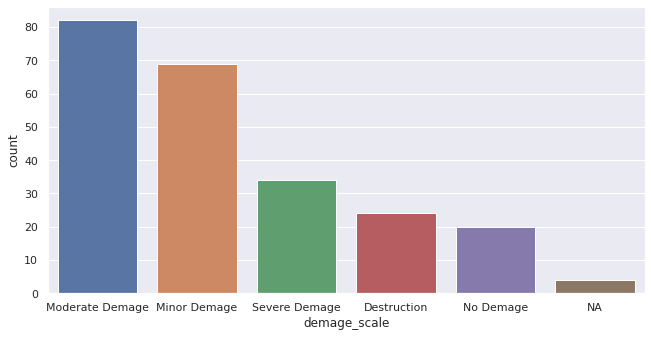

In [146]:
sns.set(rc={'figure.figsize':(10.7,5.27)})
sns.countplot(x="demage_scale", data=ip_df, order = ip_df['demage_scale'].value_counts().index)

In [ ]:
### Visible Dameged Components
#### There are multiple Visible Damaged Components in each house due to hurricanes
### Which component is damaged more.  

Top 10 Visual Damage Components are ...


detached_skirting                154
detached_siding                  131
roof                              99
wall                              96
broken_window                     43
foundation                        43
roof_shingle_loss                 42
debris_or_impact_failure          40
porch_damage                      37
out-of-plane_wall_failure         31
roof_sheathing_connection         28
wall_sheathing_connection         26
wall_sheathing_failure            21
roof_to_wall_connection           16
detached_or_damaged_gutter        10
wall_to_foundation_connection      9
stilt_damage                       7
none_or_NA                         7
in-plane_wall_failure              6
garage_door_damage                 5
carport_damage                     4
Name: vdc, dtype: int64

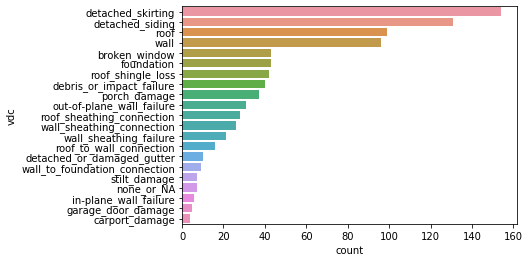

In [19]:
damge_lst = []
for item in ip_df['Visible Damaged Components'].str.split(','):
    damge_lst.extend(item)

print("Top 10 Visual Damage Components are ...")
vdc['vdc'].value_counts()
vdc = pd.DataFrame(damge_lst, columns=['vdc'])
sns.countplot(y="vdc", data=vdc, order = vdc['vdc'].value_counts().index)


In [ ]:
### Building type vs Damage,
#### We have only two diffeent Building Type's

In [20]:
print("Type of Buildings are..")
ip_df['Building Type'].value_counts()

Type of Buildings are..


MHU - Manufactured home               164
SBE - Site-built elevated building     69
Name: Building Type, dtype: int64

In [ ]:
### Comparing Damage level with Building Type.

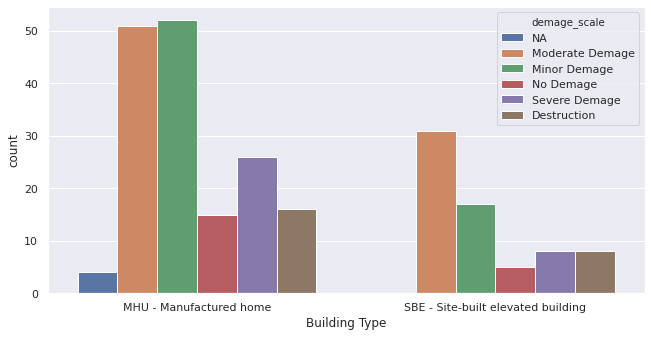

In [267]:
# ip_df.head(1)
# sns.barplot(y="Building Type",x='Damage State', data=ip_df)
sns.countplot(x="Building Type", hue="demage_scale", data=ip_df) 
# ip_df.describe()

1    210
2     21
3      2
Name: Number of above ground stories, dtype: int64

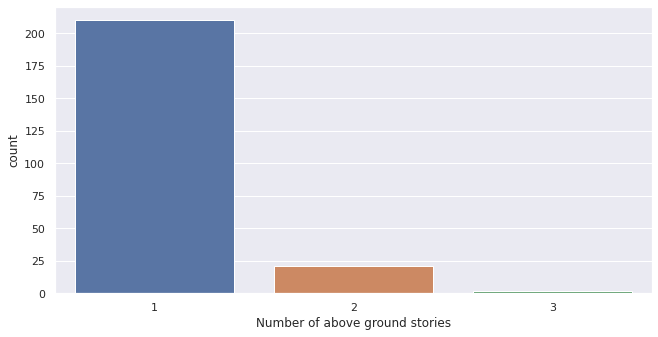

In [208]:
ip_df['Number of above ground stories'].value_counts()
sns.countplot(x="Number of above ground stories", data=ip_df)

In [212]:
# sns.countplot(x="demage_scale", hue="Number of above ground stories", data=ip_df)
# sns.countplot(x="Number of above ground stories", hue='demage_scale' , data=ip_df)

In [213]:
# ip_df.describe()

In [ ]:
### Damage Vs Roof Type

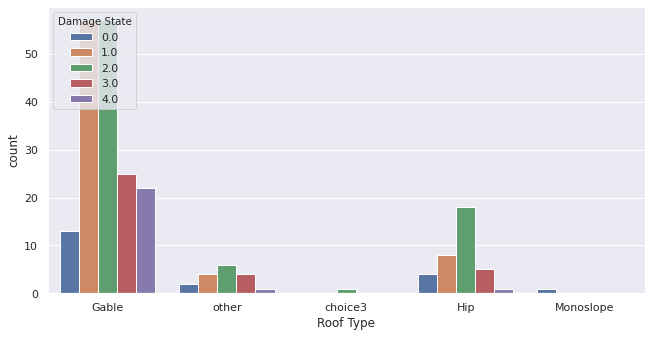

In [166]:
# d.loc[d.column1 == 1].iloc[:, 2:]
sns.countplot(x='Roof Type', data=ip_df.loc[ip_df['Damage State']!=10 ,], hue='Damage State')

In [ ]:
#### Roof Type and Building Type

MHU - Manufactured home               164
SBE - Site-built elevated building     69
Name: Building Type, dtype: int64

Gable        175
Hip           36
other         20
Monoslope      1
choice3        1
Name: Roof Type, dtype: int64

Roof Type  Building Type                     
Gable      MHU - Manufactured home               142
           SBE - Site-built elevated building     33
Hip        MHU - Manufactured home                 3
           SBE - Site-built elevated building     33
Monoslope  MHU - Manufactured home                 1
choice3    MHU - Manufactured home                 1
other      MHU - Manufactured home                17
           SBE - Site-built elevated building      3
Name: Building Type, dtype: int64

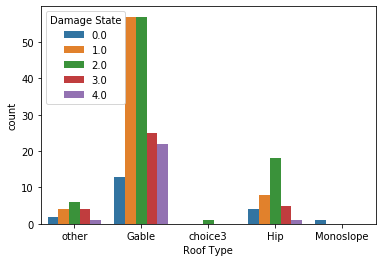

In [22]:
ip_df[ 'Building Type'].value_counts()
ip_df['Roof Type'].value_counts()

ip_df.groupby(['Roof Type','Building Type'])['Building Type'].count()
sns.countplot(x='Roof Type', data=ip_df.loc[ip_df['Building Type']!=10 ,], hue='Damage State')

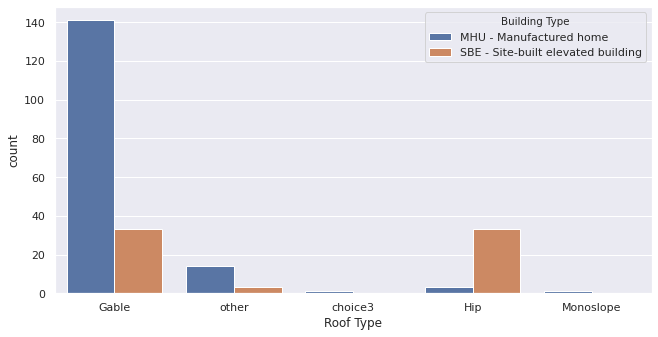

In [241]:
sns.countplot(x='Roof Type', data=ip_df.loc[ip_df['Damage State']!=10 ,],  hue='Building Type')

In [ ]:
#### Impact of Elevation of lowest horizontal structural componen for the Damage

### just trying to identify the mean value for each Damage State.

### higher mean value of horizontal structural component, will cause moderate damage, 
### there is not much difference in less and heavy damage, structural component values.

Damage State and Mean Value


Damage State
0.0    37.200000
1.0    46.731884
2.0    57.853659
3.0    47.691176
4.0    45.833333
Name: Elevation of lowest horizontal structural component (in.), dtype: float64

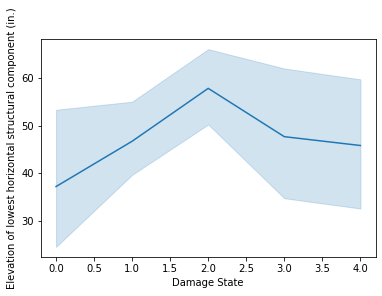

In [23]:
print("Damage State and Mean Value")
ip_df.groupby(['Damage State'])['Elevation of lowest horizontal structural component (in.)'].mean()
sns.lineplot(x = 'Damage State',y = 'Elevation of lowest horizontal structural component (in.)', data=ip_df.loc[ip_df['Damage State']!=10  ,])